# Particle motion in electromagnetic fields

[A. Petrenko](https://www.inp.nsk.su/~petrenko/) (Novosibirsk, 2021)

The equations of particle motion under the Lorentz force (in SI units)

\begin{equation}
\frac{d \mathbf{p}}{dt} = q \mathbf{E} + q[\mathbf{v} \times \mathbf{B}],
\end{equation}

\begin{equation}
\frac{d \mathbf{r}}{dt} = \mathbf{v},
\end{equation}

\begin{equation}
\mathbf{p} = \gamma m \mathbf{v}.
\end{equation}

Particle velocity $\mathbf{v}$ can be derived from the momentum $\mathbf{p}$ using the definition of relativistic factor $\gamma = \left(1 - \frac{v^2}{c^2}\right)^{-1/2} = \sqrt{1 + \left(\frac{p}{mc}\right)^2}$.

Therefore the equations of motion

\begin{equation}
\frac{ d\mathbf{r} }{dt} = \frac{\mathbf{p}}{\gamma m},\\
\frac{d\mathbf{p}}{dt} = q \mathbf{E} + q\left[\frac{\mathbf{p}}{\gamma m} \times \mathbf{B}\right].
\end{equation}

And the final 6d vector equation to solve $d\mathbf{Y}/dt = \mathbf{F}(t,\mathbf{Y})$:

\begin{equation}
\frac{d}{dt}
\left(
\begin{array}{c}
x \\
y \\
z \\
p_x \\
p_y \\
p_z
\end{array}
\right) =
\left(
\begin{array}{c}
p_x/\gamma m \\
p_y/\gamma m \\
p_z/\gamma m \\
qE_x + q(p_y B_z - p_z B_y)/\gamma m \\
qE_y - q(p_x B_z - p_z B_x)/\gamma m \\
qE_z + q(p_x B_y - p_y B_x)/\gamma m
\end{array}
\right).
\end{equation}

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

Define external fields:

In [2]:
def E(x,y,z,t): # V/m
    Ex = 0; Ey = 0; Ez = 0
    return Ex, Ey, Ez

In [3]:
def B(x,y,z,t): # T
    Bx = 0; By = 0; Bz = 1.0 # T
    return Bx, By, Bz

Define some constants:

In [4]:
c = 299792458 # m/sec
e = 1.602176634e-19 # C
eV = e # J
keV = 1e3*eV; MeV = 1e6*eV; GeV = 1e9*eV

sec = 1; ns = 1e-9*sec

# electron:
q = -e
mc2 = 511*keV # J

mc  = mc2/c # kg*m/sec
m   = mc/c # kg

In [5]:
def F(t,Y):
    x  = Y[0]; y  = Y[1]; z  = Y[2]
    px = Y[3]; py = Y[4]; pz = Y[5]
    gamma = np.sqrt(1 + (px*px + py*py + pz*pz)/(mc*mc))
    Ex, Ey, Ez = E(x,y,z,t) # V/m
    Bx, By, Bz = B(x,y,z,t) # T
    
    return np.array([
        px/(gamma*m),
        py/(gamma*m),
        pz/(gamma*m),
        q*Ex + q*(py*Bz-pz*By)/(gamma*m),
        q*Ey - q*(px*Bz-pz*Bx)/(gamma*m),
        q*Ez + q*(px*By-py*Bx)/(gamma*m)
    ])

Set the initial particle coordinates

In [6]:
x  = 0; y  = 0; z  = 0
px = 0.5*GeV/c; py = 0; pz = 0.1*GeV/c

Y0 = np.array([x,y,z,px,py,pz])

In [7]:
t_span = (0, 200*ns) # sec

t_eval = np.linspace(t_span[0], t_span[1], 500) # points of output

In [8]:
#help(solve_ivp)

In [9]:
%%time
sol = solve_ivp(F, t_span, Y0, t_eval=t_eval, max_step=5*ns) # rtol=1e-4

CPU times: user 23.8 ms, sys: 570 μs, total: 24.4 ms
Wall time: 25.3 ms


## Plot the results

In [10]:
import plotly.io as pio
import plotly.graph_objects as go

In [11]:
#pio.renderers
#pio.renderers.default

In [12]:
pio.renderers.default = "plotly_mimetype" # interactive plots in the notebook, written as png-images by nbconvert to html
#pio.renderers.default = "plotly_mimetype+notebook" # both notebook & html are interactive
#pio.renderers.default = "svg" # svg figures (for publications)

In [13]:
pio.templates.default = pio.templates["simple_white"]

In [14]:
x, y, z, px, py, pz = sol.y

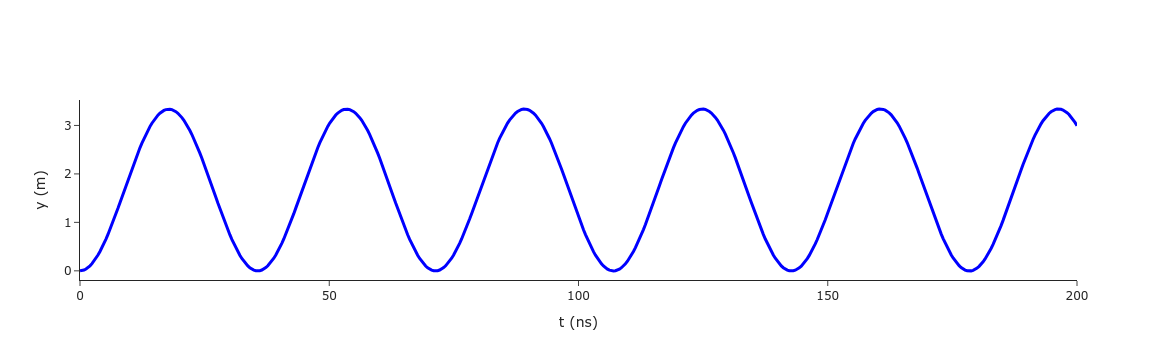

In [15]:
fig = go.Figure()

fig.add_trace( go.Scatter(x=t_eval/ns, y=y, mode='lines', line_width=3, line_color="blue"))

fig.update_xaxes(title_text="t (ns)")
fig.update_yaxes(title_text="y (m)")

fig.show()

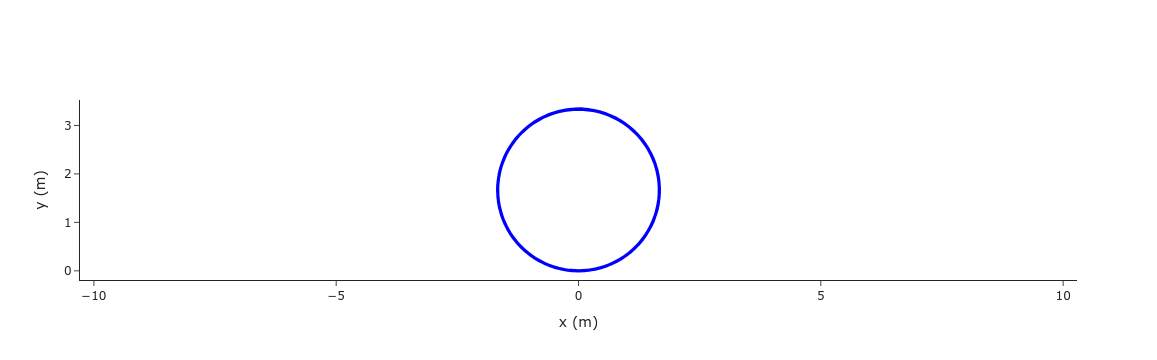

In [16]:
fig = go.Figure()

fig.add_trace( go.Scatter(x=x, y=y, mode='lines', line_width=3, line_color="blue"))

fig.update_xaxes(title_text="x (m)")
fig.update_yaxes(title_text="y (m)", scaleanchor = "x", scaleratio = 1)

fig.show()

Check if the [Larmor radius](https://en.wikipedia.org/wiki/Gyroradius) agrees with the theory:

In [17]:
Bx, By, Bz = B(0,0,0,0) # T

R = px[0]/(q*Bz) # m
R

-1.6678204759907602

In [18]:
fig.add_trace( go.Scatter(x=[0,0], y=[0,2*np.abs(R)], mode='lines', line_width=3, line_color="black", name='2R'))
fig.show()

In [19]:
pwd

'/data/shared/Acc_Course_2025/2025.02.20_General_Tracking'

In [20]:
%load_ext watermark

In [21]:
%watermark --iversions --conda --machine --python

Python implementation: CPython
Python version       : 3.12.2
IPython version      : 8.27.0

conda environment: n/a

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 6.11.0-19-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 20
Architecture: 64bit

sys    : 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
json   : 2.0.9
IPython: 8.27.0
scipy  : 1.13.1
plotly : 5.24.1
numpy  : 1.26.4



In [23]:
!jupyter nbconvert --to HTML general_tracking.ipynb

[NbConvertApp] Converting notebook general_tracking.ipynb to HTML
/opt/anaconda3/share/jupyter/nbconvert/templates/base/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 386351 bytes to general_tracking.html
